Text(0.5, 1.0, 'color image')

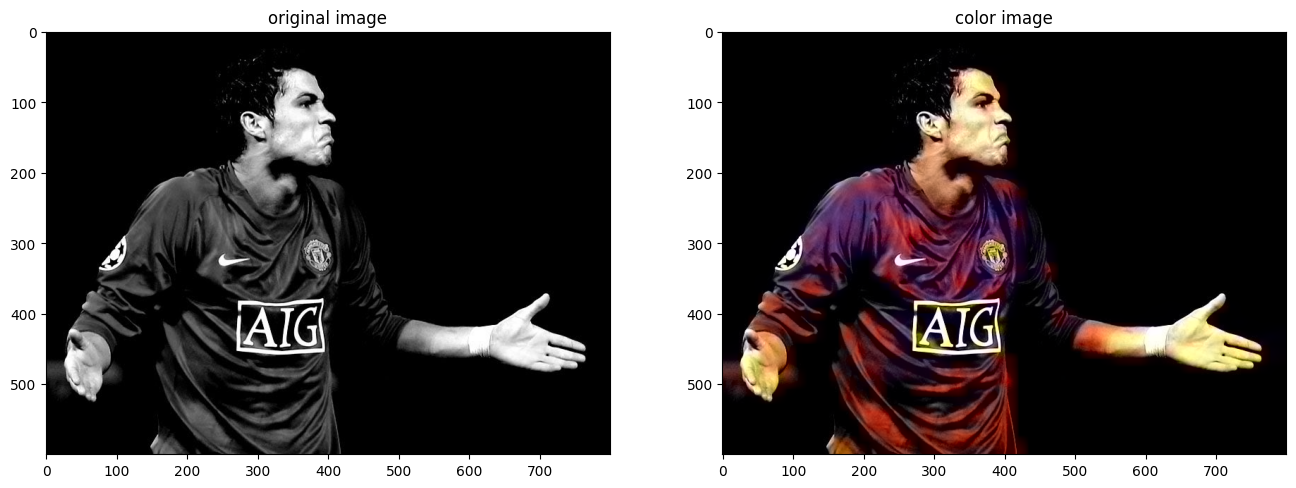

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

conf = 'colorization_deploy_v2.prototxt'
model = 'colorization_release_v2.caffemodel'
pts = 'pts_in_hull.npy'

net = cv.dnn.readNetFromCaffe(conf, model)
pts = np.load(pts)

class8 = net.getLayerId("class8_ab")
conv8 = net.getLayerId("conv8_313_rh")

pts = pts.transpose().reshape(2, 313, 1, 1)
net.getLayer(class8).blobs = [pts.astype("float32")]
net.getLayer(conv8).blobs = [np.full([1, 313], 2.606, dtype="float32")]


image_gary = cv.imread('gray.jpg')
scaled = image_gary.astype("float32") / 255.0
lab = cv.cvtColor(scaled, cv.COLOR_BGR2LAB)


resized = cv.resize(lab, (224, 224))
L = cv.split(resized)[0]
L -= 50

net.setInput(cv.dnn.blobFromImage(L))
ab = net.forward()[0, :, :, :].transpose((1, 2, 0))


ab = cv.resize(ab, (image_gary.shape[1], image_gary.shape[0]))
L = cv.split(lab)[0]

colored_image = np.concatenate((L[:, :, np.newaxis], ab), axis=2)
colored_image = cv.cvtColor(colored_image, cv.COLOR_LAB2BGR)
colored_image = np.clip(colored_image, 0, 1)

plt.figure(figsize=[16,9])
plt.subplot(121)
plt.imshow(image_gary, cmap='gray')
plt.title('original image')
plt.subplot(122)
plt.imshow(colored_image[...,::-1])
plt.title('color image')